# Data Processing


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

data = pd.read_csv("MetroPT3.csv")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516948 entries, 0 to 1516947
Data columns (total 17 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1516948 non-null  int64  
 1   timestamp        1516948 non-null  object 
 2   TP2              1516948 non-null  float64
 3   TP3              1516948 non-null  float64
 4   H1               1516948 non-null  float64
 5   DV_pressure      1516948 non-null  float64
 6   Reservoirs       1516948 non-null  float64
 7   Oil_temperature  1516948 non-null  float64
 8   Motor_current    1516948 non-null  float64
 9   COMP             1516948 non-null  float64
 10  DV_eletric       1516948 non-null  float64
 11  Towers           1516948 non-null  float64
 12  MPG              1516948 non-null  float64
 13  LPS              1516948 non-null  float64
 14  Pressure_switch  1516948 non-null  float64
 15  Oil_level        1516948 non-null  float64
 16  Caudal_impulses  1

##I. Data Introduction

The MetroPT-3 dataset was created to support the development of predictive maintenance, anomaly detection, and remaining useful life (RUL) prediction models for compressors using deep learning and machine learning methods. It consists of multivariate time series data from several analogue and digital sensors installed on a train compressor. The data spans between February and August 2020 and includes 15 signals, such as pressures, motor current, oil temperature, and electrical signals of air intake valves. The dataset is eligible for incremental training and does not contain sensitive data. Data preprocessing includes data segmentation, normalization, and feature extraction. The dataset is unlabeled, but failure reports provided by the company are available for evaluating the effectiveness of anomaly detection, failure prediction, and RUL estimation algorithms. The dataset does not have missing values.

This dataset was chosen because it contains information that was obtained from actual events that accurately reflect real-world situations. This makes it a valuable resource for developing and testing algorithms in the field of anomaly detection, failure prediction, and remaining useful life estimation. Additionally, the availability of failure reports from the company allows us to validate the performance of our algorithms against real-world incidents. Also, this dataset is also represent time series attribute, which is crucial for analyzing trends and patterns over a specific period. The inclusion of time series data enables researchers to observe the progression of anomalies and failures, providing deeper insights into their causes and potential mitigation strategies.

##II. Data Cleaning and Pre-precessing

## Data Overview

In [3]:
print(data.describe().round(2))
print(data.columns)

        Unnamed: 0         TP2         TP3          H1  DV_pressure  \
count   1516948.00  1516948.00  1516948.00  1516948.00   1516948.00   
mean    7584735.00        1.37        8.98        7.57         0.06   
std     4379053.12        3.25        0.64        3.33         0.38   
min           0.00       -0.03        0.73       -0.04        -0.03   
25%     3792367.50       -0.01        8.49        8.25        -0.02   
50%     7584735.00       -0.01        8.96        8.78        -0.02   
75%    11377102.50       -0.01        9.49        9.37        -0.02   
max    15169470.00       10.68       10.30       10.29         9.84   

       Reservoirs  Oil_temperature  Motor_current        COMP  DV_eletric  \
count  1516948.00       1516948.00     1516948.00  1516948.00  1516948.00   
mean         8.99            62.64           2.05        0.84        0.16   
std          0.64             6.52           2.30        0.37        0.37   
min          0.71            15.40           0.02   

In [4]:
print(data.head(10))

   Unnamed: 0            timestamp    TP2    TP3     H1  DV_pressure  \
0           0  2020-02-01 00:00:00 -0.012  9.358  9.340       -0.024   
1          10  2020-02-01 00:00:10 -0.014  9.348  9.332       -0.022   
2          20  2020-02-01 00:00:19 -0.012  9.338  9.322       -0.022   
3          30  2020-02-01 00:00:29 -0.012  9.328  9.312       -0.022   
4          40  2020-02-01 00:00:39 -0.012  9.318  9.302       -0.022   
5          50  2020-02-01 00:00:49 -0.012  9.306  9.290       -0.024   
6          60  2020-02-01 00:00:59 -0.012  9.296  9.280       -0.024   
7          70  2020-02-01 00:01:09 -0.014  9.286  9.270       -0.024   
8          80  2020-02-01 00:01:19 -0.012  9.276  9.258       -0.022   
9          90  2020-02-01 00:01:29 -0.012  9.264  9.248       -0.022   

   Reservoirs  Oil_temperature  Motor_current  COMP  DV_eletric  Towers  MPG  \
0       9.358           53.600         0.0400   1.0         0.0     1.0  1.0   
1       9.348           53.675         0.0400  

## Cleaning


In [5]:
print(data.columns)
data = data.drop('Unnamed: 0', axis= 1)

Index(['Unnamed: 0', 'timestamp', 'TP2', 'TP3', 'H1', 'DV_pressure',
       'Reservoirs', 'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric',
       'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level',
       'Caudal_impulses'],
      dtype='object')


## Convert the timestamp collumn into pandas.DateTime data type standarzation

In [6]:
import datetime

#Check the current type of timestamp
print(f"Current type of timestamp is {type(data.timestamp[0])}")

#Convert timestamp to pandas.DateTime ISO 8601
data['timestamp'] = data['timestamp'].apply(pd.to_datetime, format = "%Y-%m-%d %H:%M:%S")

#Re-check the type
print(f"Current type of timestamp is {type(data.timestamp[0])}")

Current type of timestamp is <class 'str'>
Current type of timestamp is <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [7]:
print(data.head(10))

            timestamp    TP2    TP3     H1  DV_pressure  Reservoirs  \
0 2020-02-01 00:00:00 -0.012  9.358  9.340       -0.024       9.358   
1 2020-02-01 00:00:10 -0.014  9.348  9.332       -0.022       9.348   
2 2020-02-01 00:00:19 -0.012  9.338  9.322       -0.022       9.338   
3 2020-02-01 00:00:29 -0.012  9.328  9.312       -0.022       9.328   
4 2020-02-01 00:00:39 -0.012  9.318  9.302       -0.022       9.318   
5 2020-02-01 00:00:49 -0.012  9.306  9.290       -0.024       9.308   
6 2020-02-01 00:00:59 -0.012  9.296  9.280       -0.024       9.298   
7 2020-02-01 00:01:09 -0.014  9.286  9.270       -0.024       9.286   
8 2020-02-01 00:01:19 -0.012  9.276  9.258       -0.022       9.276   
9 2020-02-01 00:01:29 -0.012  9.264  9.248       -0.022       9.264   

   Oil_temperature  Motor_current  COMP  DV_eletric  Towers  MPG  LPS  \
0           53.600         0.0400   1.0         0.0     1.0  1.0  0.0   
1           53.675         0.0400   1.0         0.0     1.0  1.0  0.0   

## Add a label feature

In [8]:
#Create a new column for target variable called status, indicate the equipment has deficiencies and need to be maintained
# status = 0; system ups and running
# status = 1; system downs and needs recovering
labeled_data = data.copy()
labeled_data['status'] = 0
print(labeled_data.head(5))

            timestamp    TP2    TP3     H1  DV_pressure  Reservoirs  \
0 2020-02-01 00:00:00 -0.012  9.358  9.340       -0.024       9.358   
1 2020-02-01 00:00:10 -0.014  9.348  9.332       -0.022       9.348   
2 2020-02-01 00:00:19 -0.012  9.338  9.322       -0.022       9.338   
3 2020-02-01 00:00:29 -0.012  9.328  9.312       -0.022       9.328   
4 2020-02-01 00:00:39 -0.012  9.318  9.302       -0.022       9.318   

   Oil_temperature  Motor_current  COMP  DV_eletric  Towers  MPG  LPS  \
0           53.600         0.0400   1.0         0.0     1.0  1.0  0.0   
1           53.675         0.0400   1.0         0.0     1.0  1.0  0.0   
2           53.600         0.0425   1.0         0.0     1.0  1.0  0.0   
3           53.425         0.0400   1.0         0.0     1.0  1.0  0.0   
4           53.475         0.0400   1.0         0.0     1.0  1.0  0.0   

   Pressure_switch  Oil_level  Caudal_impulses  status  
0              1.0        1.0              1.0       0  
1              1.0  

Next, set the status of the machine to 1 based on the time from the table below

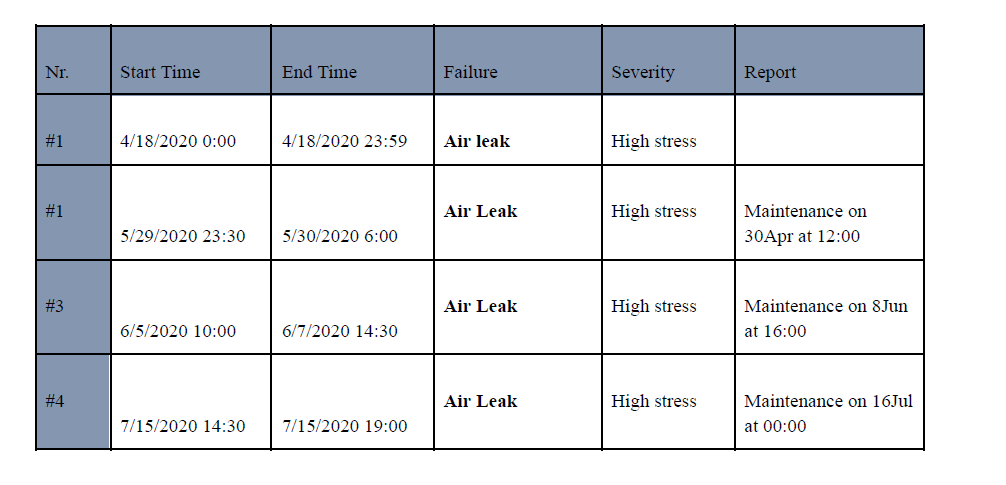

In [9]:
def to_datetime(xs):
  result = []
  format =  "%Y-%m-%d %H:%M:%S"
  for x in xs:
    result.append(pd.to_datetime(x, format = format))
  return result


failure_start_time = to_datetime(["2020-04-18 00:00:00", "2020-05-29 23:30:00", "2020-06-05 10:00:00", "2020-07-15 14:30:00"] )
failure_end_time   = to_datetime(["2020-04-18 23:59:00", "2020-05-30 06:00:00", "2020-06-07 14:30:00", "2020-07-15 19:00:00"] )

print(failure_start_time,"\n", failure_end_time[0].minute)

[Timestamp('2020-04-18 00:00:00'), Timestamp('2020-05-29 23:30:00'), Timestamp('2020-06-05 10:00:00'), Timestamp('2020-07-15 14:30:00')] 
 59


In [10]:
def in_between(x, start, end):

  start_con = x >= start
  end_con = x<= end

  inbetween_con = start_con and end_con
  if inbetween_con:
    return 1
  else:
    return 0

In [11]:
failure_indx = []
import numpy as np
for i, (start_time, end_time) in enumerate(zip(failure_start_time, failure_end_time)):
  mask = labeled_data['timestamp'].apply(in_between, start = start_time, end = end_time)
  indx = labeled_data.index[mask == True].tolist()
  failure_indx += indx


print(f" Found {len(failure_indx)} samples representing failure state")

 Found 29954 samples representing failure state


In [12]:
#Set the sample with the timestamp falled between the failure time to 1
labeled_data['status'].iloc[failure_indx] = 1

/tmp/ipykernel_6226/4086430353.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  labeled_data['status'].iloc[failure_indx] = 1
/tmp/ipykernel_6226/4086430353.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [13]:
#Check the number of possitive samples
print(f"We have {labeled_data['status'][labeled_data['status']==1].count()} positve samples" )

We have 29954 positve samples


In [14]:
print(f"Example of Failure state \n {labeled_data[labeled_data['status']==1].head()}")

Example of Failure state 
                  timestamp    TP2    TP3     H1  DV_pressure  Reservoirs  \
562564 2020-04-18 00:00:01 -0.018  8.248  8.238       -0.024       8.248   
562565 2020-04-18 00:00:13 -0.018  8.248  8.238       -0.024       8.248   
562566 2020-04-18 00:00:24 -0.018  8.248  8.238       -0.024       8.248   
562567 2020-04-18 00:00:36 -0.018  8.248  8.238       -0.024       8.248   
562568 2020-04-18 00:00:49 -0.018  8.248  8.238       -0.024       8.248   

        Oil_temperature  Motor_current  COMP  DV_eletric  Towers  MPG  LPS  \
562564            49.45           0.04   1.0         0.0     1.0  1.0  0.0   
562565            49.45           0.04   1.0         0.0     1.0  1.0  0.0   
562566            49.45           0.04   1.0         0.0     1.0  1.0  0.0   
562567            49.45           0.04   0.0         0.0     0.0  0.0  0.0   
562568            49.45           0.04   1.0         0.0     1.0  1.0  0.0   

        Pressure_switch  Oil_level  Caudal_impu

## splite the dataset

In [15]:
#Seperate Positive samples and Negative sample
pos_data = labeled_data[labeled_data['status'] == 1]
neg_data = labeled_data[labeled_data['status'] == 0]

#Print out the info of 2 dataset
print(f"Positive dataset\n {pos_data.info()}\n")
print(f"Negative dataset\n {neg_data.info()}\n")

<class 'pandas.core.frame.DataFrame'>
Index: 29954 entries, 562564 to 1172714
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   timestamp        29954 non-null  datetime64[ns]
 1   TP2              29954 non-null  float64       
 2   TP3              29954 non-null  float64       
 3   H1               29954 non-null  float64       
 4   DV_pressure      29954 non-null  float64       
 5   Reservoirs       29954 non-null  float64       
 6   Oil_temperature  29954 non-null  float64       
 7   Motor_current    29954 non-null  float64       
 8   COMP             29954 non-null  float64       
 9   DV_eletric       29954 non-null  float64       
 10  Towers           29954 non-null  float64       
 11  MPG              29954 non-null  float64       
 12  LPS              29954 non-null  float64       
 13  Pressure_switch  29954 non-null  float64       
 14  Oil_level        29954 non-null  flo

As we can see, we have around 30K postive samples and 1500K negative sample. This indicates highly imbalanced dataset. Thus, we have to subsample the negative class to balance the training data. To achive this, we will randomly sample 30K negative sample from the set of 1500K sample.

In [16]:
n_positives = int(pos_data['status'].count())
sub_neg_data = neg_data.sample(n_positives, random_state = 42)
print(f"Negative dataset after subsampling {sub_neg_data.info()}")

<class 'pandas.core.frame.DataFrame'>
Index: 29954 entries, 1306134 to 1276653
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   timestamp        29954 non-null  datetime64[ns]
 1   TP2              29954 non-null  float64       
 2   TP3              29954 non-null  float64       
 3   H1               29954 non-null  float64       
 4   DV_pressure      29954 non-null  float64       
 5   Reservoirs       29954 non-null  float64       
 6   Oil_temperature  29954 non-null  float64       
 7   Motor_current    29954 non-null  float64       
 8   COMP             29954 non-null  float64       
 9   DV_eletric       29954 non-null  float64       
 10  Towers           29954 non-null  float64       
 11  MPG              29954 non-null  float64       
 12  LPS              29954 non-null  float64       
 13  Pressure_switch  29954 non-null  float64       
 14  Oil_level        29954 non-null  fl

Now, we merge the postive set and negative set into one

In [17]:
merged_data = pd.concat([pos_data, sub_neg_data], axis = 0)
print(f"Merged dataset\n")
merged_data.info()

Merged dataset

<class 'pandas.core.frame.DataFrame'>
Index: 59908 entries, 562564 to 1276653
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   timestamp        59908 non-null  datetime64[ns]
 1   TP2              59908 non-null  float64       
 2   TP3              59908 non-null  float64       
 3   H1               59908 non-null  float64       
 4   DV_pressure      59908 non-null  float64       
 5   Reservoirs       59908 non-null  float64       
 6   Oil_temperature  59908 non-null  float64       
 7   Motor_current    59908 non-null  float64       
 8   COMP             59908 non-null  float64       
 9   DV_eletric       59908 non-null  float64       
 10  Towers           59908 non-null  float64       
 11  MPG              59908 non-null  float64       
 12  LPS              59908 non-null  float64       
 13  Pressure_switch  59908 non-null  float64       
 14  Oil_level        599

## Valeurs abirrantes

In [18]:
def investigate_outliers(data, c):
    q1 = data[c].quantile(0.25)
    q3 = data[c].quantile(0.75)
    iqr = q3 - q1
    ll = q1 - 1.5*iqr
    ul = q3 + 1.5*iqr

    num_outliers = data[data[c] < ll][c].count()  + data[data[c] > ul][c].count()
    if num_outliers>0:
        print(f"Found {num_outliers} oulier(s) for feature {c}")
    return {'col': c, 'n_outliers': num_outliers, 'll': ll, 'ul': ul, 'q1': q1, 'q3':q3}

print("\nDropping outliers ...\n")
clean_data = merged_data.copy()
for i in range(5):
  for c in clean_data.columns:
      if c not in ["Unnamed: 0","timestamp"]:
          cue = investigate_outliers(clean_data, c)
          if cue["n_outliers"] > 0 and (cue["q1"]!= cue["q3"]):
              print(f"Droping {cue['n_outliers']} from column {c}")
              clean_data = clean_data[clean_data[c]> cue["ll"]]
              clean_data = clean_data[clean_data[c]< cue["ul"]]
              print(f"{clean_data.shape[0]} samples left\n")
          elif (cue["q1"]== cue["q3"]):
              print("Skipping .. data has Q1 equals to Q3")
              print(f"{clean_data.shape[0]} rows left\n")


print("\nDropping Completed ...\n")
#Recheck data
for c in clean_data.columns:
    if c not in ["Unnamed: 0","timestamp","COMP", 'status']:
        cue = investigate_outliers(clean_data, c)


Dropping outliers ...

Found 424 oulier(s) for feature TP3
Droping 424 from column TP3
59484 samples left

Found 5 oulier(s) for feature DV_pressure
Droping 5 from column DV_pressure
59479 samples left

Found 3 oulier(s) for feature Reservoirs
Droping 3 from column Reservoirs
59476 samples left

Found 29 oulier(s) for feature Oil_temperature
Droping 29 from column Oil_temperature
59447 samples left

Found 395 oulier(s) for feature LPS
Skipping .. data has Q1 equals to Q3
59447 rows left

Found 402 oulier(s) for feature Pressure_switch
Skipping .. data has Q1 equals to Q3
59447 rows left

Found 2897 oulier(s) for feature Oil_level
Skipping .. data has Q1 equals to Q3
59447 rows left

Found 1948 oulier(s) for feature Caudal_impulses
Skipping .. data has Q1 equals to Q3
59447 rows left

Found 2 oulier(s) for feature Oil_temperature
Droping 2 from column Oil_temperature
59445 samples left

Found 395 oulier(s) for feature LPS
Skipping .. data has Q1 equals to Q3
59445 rows left

Found 402 

In [19]:
#Investigate the columns with the binary values
binary_cols = ['LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses']
#Ensure the the binary data is binary
clean_data[binary_cols] = clean_data[binary_cols].apply(np.round)

### 7) Summary

In summary, prior to undergoing preprocessing, the dataset:

- has unnecessary collumn
- has columns with wrong format
- is unlabeled
- is highly imbalanced
- has outliers

Thus, throughout the preprocessing and data cleaning phase, we performed the following tasks:

- remove unnecessary column
- format the timestamp column
- add column for target variable
- subsample to balance the dataset
- find and drop all outliers

According to its documentation, the following preprocessing steps have been conducted before publishing the data, so we do not apply it in our work:

- Data segmentation
- Normalization
- Feature Extraction

## III. Exploratory Data Analysis

### 1) Correlation

Describing the correlation between the features, the values closer to 1 or -1 represent a stronger relation.

In [20]:
clean_data.corr().round(2)

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,status
timestamp,1.00,0.08,-0.15,-0.09,0.03,-0.15,0.35,0.13,-0.10,0.09,-0.05,-0.09,0.08,-0.01,-0.35,0.24,0.08
TP2,0.08,1.00,-0.42,-0.98,0.81,-0.42,0.74,0.87,-0.98,0.98,-0.52,-0.97,0.06,0.00,0.19,0.14,0.83
TP3,-0.15,-0.42,1.00,0.54,-0.55,1.00,-0.28,-0.17,0.49,-0.48,0.27,0.48,-0.18,0.01,-0.14,-0.13,-0.55
H1,-0.09,-0.98,0.54,1.00,-0.83,0.54,-0.73,-0.84,0.99,-0.99,0.54,0.99,-0.07,0.01,-0.20,-0.15,-0.86
DV_pressure,0.03,0.81,-0.55,-0.83,1.00,-0.55,0.73,0.72,-0.83,0.83,-0.45,-0.83,-0.05,0.02,0.21,0.17,0.92
Reservoirs,-0.15,-0.42,1.00,0.54,-0.55,1.00,-0.28,-0.17,0.49,-0.48,0.27,0.48,-0.18,0.01,-0.14,-0.13,-0.55
Oil_temperature,0.35,0.74,-0.28,-0.73,0.73,-0.28,1.00,0.79,-0.75,0.76,-0.41,-0.75,0.10,0.02,0.10,0.11,0.81
Motor_current,0.13,0.87,-0.17,-0.84,0.72,-0.17,0.79,1.00,-0.87,0.87,-0.47,-0.87,0.06,0.00,0.14,0.10,0.74
COMP,-0.10,-0.98,0.49,0.99,-0.83,0.49,-0.75,-0.87,1.00,-0.99,0.55,1.00,-0.07,0.07,-0.17,-0.12,-0.86
DV_eletric,0.09,0.98,-0.48,-0.99,0.83,-0.48,0.76,0.87,-0.99,1.00,-0.53,-0.99,0.07,0.03,0.19,0.14,0.86


We can see that our target variable "status" has high correlation with TP2, H1, DV_pressure, Oil_temparature, Motor_current, COMP, DV_electric and MPG.  

## Correlation

Below shows a Heat map,which can be used to analyse trends, from the below heat map you can see the trends in correlation of data.

<Axes: >

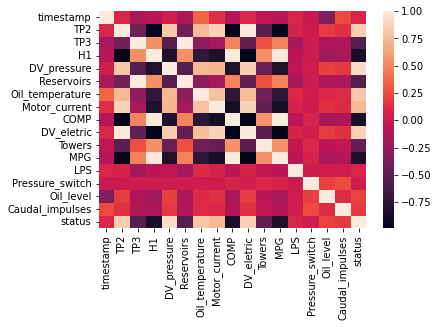

In [21]:
sns.heatmap(clean_data.corr().round(2),annot=False )

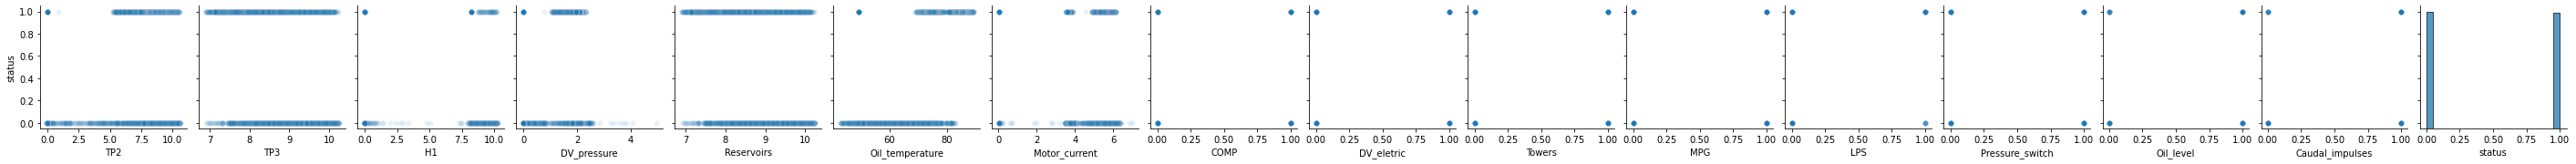

In [22]:
sns.pairplot(clean_data,  y_vars = ['status'] , plot_kws=  {'alpha' : 0.1})

Drawing box plot to find outliers, I plot it on scale data so it is easier to visualize different features' range.
As we can see our preprocessing function work perfectly that leaves no outliers


In [27]:
clean_data.to_csv('RailGuadrs_Clean_Data.csv')
np.savez("RailGuadrs_Clean_Data.npz", clean_data.to_numpy())

# Models


## LinearRegression

In [28]:
data_regression = pd.read_csv('RailGuadrs_Clean_Data.csv')
X = data_regression.iloc[:, 2:-1]
y = data_regression.iloc[:, -1]
X

,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,-0.018,8.248,8.238,-0.024,8.248,49.450,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,-0.018,8.248,8.238,-0.024,8.248,49.450,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,-0.018,8.248,8.238,-0.024,8.248,49.450,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,-0.018,8.248,8.238,-0.024,8.248,49.450,0.0400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.018,8.248,8.238,-0.024,8.248,49.450,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59440,-0.012,8.484,8.466,-0.014,8.488,58.175,0.0325,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
59441,-0.010,9.180,9.166,-0.018,9.182,63.650,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
59442,7.762,8.610,-0.004,0.578,8.610,77.850,5.5700,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
59443,-0.014,8.770,8.756,-0.016,8.774,55.825,0.0350,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [29]:
y

0        1
1        1
2        1
3        1
4        1
        ..
59440    0
59441    0
59442    0
59443    0
59444    0
Name: status, Length: 59445, dtype: int64

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape)

(47556, 15) (11889, 15)


In [56]:
from sklearn.preprocessing import StandardScaler


model_regression = LogisticRegression(max_iter=10000)
model_regression.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [57]:
print(X_train.columns)
print(f"the coef of the model are : {model_regression.coef_}")
print(f"the intercept is : {model_regression.intercept_}")

Index(['TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Oil_temperature',
       'Motor_current', 'COMP', 'DV_eletric', 'Towers', 'MPG', 'LPS',
       'Pressure_switch', 'Oil_level', 'Caudal_impulses'],
      dtype='object')
the coef of the model are : [[-0.34029583  0.04752702 -0.51335437  2.81933098 -0.17156532  0.41909646
  -0.59126663 -2.45293933 -4.17565773 -0.11894046 -1.94093116  1.97198215
  -0.82258566  1.53886918  1.16074698]]
the intercept is : [-23.28106631]


In [58]:
y_pred = model_regression.predict(X_test)

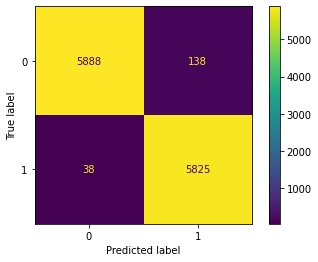

In [60]:
confusion_matrix = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [65]:
print(f'the accuracy is {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

the accuracy is 0.9851964000336445
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      6026
           1       0.98      0.99      0.99      5863

    accuracy                           0.99     11889
   macro avg       0.99      0.99      0.99     11889
weighted avg       0.99      0.99      0.99     11889



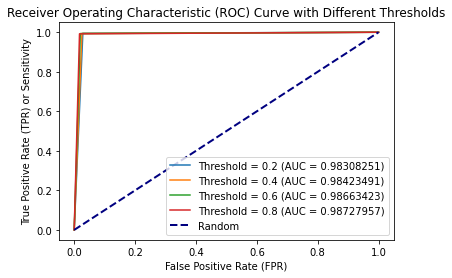

In [66]:
y_prob = model_regression.predict_proba(X_test)[:, 1]
for threshold in [0.2, 0.4, 0.6, 0.8]:
    y_pred_threshold = (y_prob > threshold).astype(int)
    fpr, tpr, _ = roc_curve(y_test, y_pred_threshold)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='Threshold = {:.1f} (AUC = {:.8f})'.format(threshold, roc_auc))
    #print(threshold, format(roc_auc))
# Plot the "Random" line as a dashed line from (0,0) to (1,1) for reference
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')

# Label axes and set the title for the plot
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) or Sensitivity')
plt.title('Receiver Operating Characteristic (ROC) Curve with Different Thresholds')
plt.legend(loc='lower right')
plt.show()

## Predict with LogisticRegression

In [68]:
# Example: new sample based on the features
new_sample = {
    'TP2': [-0.018],
    'TP3': [8.248],
    'H1': [8.238],
    'DV_pressure': [-0.024],
    'Reservoirs': [8.248],
    'Oil_temperature': [49.450],
    'Motor_current': [0.0400],
    'COMP': [1.0],
    'DV_eletric': [0.0],
    'Towers': [1.0],
    'MPG': [1.0],
    'LPS': [0.0],
    'Pressure_switch': [1.0],
    'Oil_level': [1.0],
    'Caudal_impulses': [1.0]
}

new_df = pd.DataFrame(new_sample)
new_sample


{'TP2': [-0.018],
 'TP3': [8.248],
 'H1': [8.238],
 'DV_pressure': [-0.024],
 'Reservoirs': [8.248],
 'Oil_temperature': [49.45],
 'Motor_current': [0.04],
 'COMP': [1.0],
 'DV_eletric': [0.0],
 'Towers': [1.0],
 'MPG': [1.0],
 'LPS': [0.0],
 'Pressure_switch': [1.0],
 'Oil_level': [1.0],
 'Caudal_impulses': [1.0]}

In [69]:
scaler = StandardScaler()
new_scaled = scaler.fit_transform(new_df)  # Scaling the single sample

# Predict the class using the logistic regression model
y_pred = model_regression.predict(new_scaled)

# Alternatively, get the probability for class 1 (if you want the probability rather than the class label)
y_pred_prob = model_regression.predict_proba(new_scaled)[:, 1]

# Output the prediction result
print(f"Prediction (Class): {y_pred}")
print(f"Probability of class 1: {y_pred_prob}")

Prediction (Class): [0]
Probability of class 1: [7.74749611e-11]


/home/ubuntu/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# Naive Bayes


In [71]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB, BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

In [72]:
dataset = pd.read_csv('RailGuadrs_Clean_Data.csv')
features = ['timestamp', 'TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs',
            'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric',
            'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses']
target = 'status'

In [73]:
dataset['timestamp'] = pd.to_datetime(dataset['timestamp'], errors='coerce')
dataset['timestamp'] = (dataset['timestamp'] - dataset['timestamp'].min())  / np.timedelta64(1,'D')

In [74]:
X = dataset[features]
y = dataset[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
gaussian_classifier = GaussianNB()
bernoulli_classifier = BernoulliNB()

#Since the multinomial Naive Bayes can not handle negatives value dues to the fact that
#Naive Bayes based on applying Bayes' theorem with strong (naive) independence assumptions between the features.
#We need to add preprocessing step to move the data off the negative zone

multinomial_classifier = Pipeline([('Normalizing',MinMaxScaler()),('MultinomialNB',MultinomialNB())])


# Train the models
gaussian_classifier.fit(X_train, y_train)
multinomial_classifier.fit(X_train, y_train)
bernoulli_classifier.fit(X_train, y_train)

# Predictions
y_pred_gaussian = gaussian_classifier.predict(X_test)
y_pred_multinomial = multinomial_classifier.predict(X_test)
y_pred_bernoulli = bernoulli_classifier.predict(X_test)

Bernoulli Naive Bayes:
              precision    recall  f1-score   support

           0       0.99      0.86      0.92      6053
           1       0.87      1.00      0.93      5836

    accuracy                           0.93     11889
   macro avg       0.93      0.93      0.93     11889
weighted avg       0.93      0.93      0.93     11889



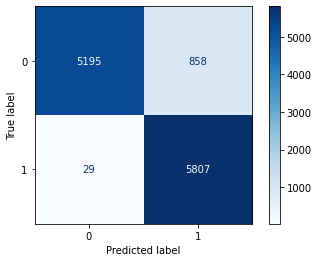

In [76]:
# Evaluate and compare the models
print("Bernoulli Naive Bayes:")
print(classification_report(y_test, y_pred_bernoulli))
conf_matrix_bernoulli = confusion_matrix(y_test, y_pred_bernoulli)
disp_bernoulli = ConfusionMatrixDisplay(conf_matrix_bernoulli, display_labels=bernoulli_classifier.classes_)
disp_bernoulli.plot(cmap='Blues', values_format='d')
plt.show()

Multinomial Naive Bayes:
              precision    recall  f1-score   support

           0       1.00      0.86      0.92      6053
           1       0.87      1.00      0.93      5836

    accuracy                           0.92     11889
   macro avg       0.93      0.93      0.92     11889
weighted avg       0.93      0.92      0.92     11889



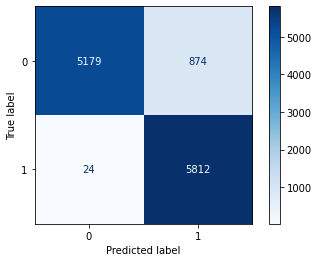

In [77]:
print("Multinomial Naive Bayes:")
print(classification_report(y_test, y_pred_multinomial))
conf_matrix_multinomial = confusion_matrix(y_test, y_pred_multinomial)
disp_multinomial = ConfusionMatrixDisplay(conf_matrix_multinomial, display_labels=multinomial_classifier.classes_)
disp_multinomial.plot(cmap='Blues', values_format='d')
plt.show()

In [79]:
new_sample = {
    'timestamp': pd.to_datetime('2024-12-02 14:00:00'),
    'TP2': 0.01,
    'TP3': 8.2,
    'H1': 8.3,
    'DV_pressure': -0.03,
    'Reservoirs': 8.3,
    'Oil_temperature': 50.0,
    'Motor_current': 0.04,
    'COMP': 1.0,
    'DV_eletric': 0.0,
    'Towers': 1.0,
    'MPG': 1.0,
    'LPS': 0.0,
    'Pressure_switch': 1.0,
    'Oil_level': 1.0,
    'Caudal_impulses': 1.0
}

In [88]:
# Ensure that the timestamp in new_sample is in datetime format
new_sample['timestamp'] = pd.to_datetime(new_sample['timestamp'])

# Ensure dataset['timestamp'].min() is a datetime object, if it's not already
dataset_min_timestamp = pd.to_datetime(dataset['timestamp'].min())

# Calculate the difference between the new sample's timestamp and the earliest timestamp in the dataset
timestamp_diff = new_sample['timestamp'] - dataset_min_timestamp

# Convert the difference to days
new_sample['timestamp'] = timestamp_diff / np.timedelta64(1, 'D')

# Convert the new sample into a DataFrame (since the model expects a DataFrame as input)
new_sample_df = pd.DataFrame([new_sample])

# Separate features from the sample
X_new = new_sample_df[features]

# Apply scaling if required (use the fitted scaler)
X_new_scaled = scaler.transform(X_new)

# Predict using each classifier
y_pred_gaussian = gaussian_classifier.predict(X_new)  # For Gaussian Naive Bayes
y_pred_multinomial = multinomial_classifier.predict(X_new_scaled)  # For Multinomial Naive Bayes
y_pred_bernoulli = bernoulli_classifier.predict(X_new)  # For Bernoulli Naive Bayes

# Print predictions
print(f"Prediction using Gaussian Naive Bayes: {y_pred_gaussian}")
print(f"Prediction using Multinomial Naive Bayes: {y_pred_multinomial}")
print(f"Prediction using Bernoulli Naive Bayes: {y_pred_bernoulli}")


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- timestamp


In [84]:
# Predict using each classifier
y_pred_gaussian = gaussian_classifier.predict(X_new)  # For Gaussian Naive Bayes
y_pred_multinomial = multinomial_classifier.predict(X_new_scaled)  # For Multinomial Naive Bayes
y_pred_bernoulli = bernoulli_classifier.predict(X_new)  # For Bernoulli Naive Bayes


NameError: name 'X_new' is not defined

In [ ]:

# Print predictions
print(f"Prediction using Gaussian Naive Bayes: {y_pred_gaussian}")
print(f"Prediction using Multinomial Naive Bayes: {y_pred_multinomial}")
print(f"Prediction using Bernoulli Naive Bayes: {y_pred_bernoulli}")
